## Предварительная подготовка данных

Подключение Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn
import statistics as std
import math

Вводим ряд времени

In [3]:
data_t = pd.read_csv('hrabrovo.csv', sep = ';')
data_e = pd.read_csv('energy.csv', sep = ';',error_bad_lines=False)
data_t['time'] = pd.to_datetime(data_t[' time'])
data_e['time'] = pd.to_datetime(data_e['time'])


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Список обозначений дат

In [4]:
import datetime as DT

start_date = DT.datetime(2018, 1, 1)
end_date = DT.datetime(2020, 12, 31)

y_axis_labels = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%d/%m/%Y').tolist()

Список обозначений времени с шагом в пол часа

In [5]:
h = 0
m = 0
t = h * 60 + m
x_axis_labels = []

while t < 1440:
    x_axis_labels += [f'{t//60:02d}:{t%60:02d}']
    t += 30

print(x_axis_labels)

['00:00', '00:30', '01:00', '01:30', '02:00', '02:30', '03:00', '03:30', '04:00', '04:30', '05:00', '05:30', '06:00', '06:30', '07:00', '07:30', '08:00', '08:30', '09:00', '09:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30']


приведем числовые признаки к типу float

In [6]:
data_t['P0'] = data_t['P0'].replace(',','.',regex= True)
data_t['P0'] = data_t['P0'].astype('float')
data_t['P'] = data_t['P'].replace(',','.',regex= True)
data_t['P'] = data_t['P'].astype('float')
data_t['VV'] = data_t['VV'].replace('10.0 and more','10.0',regex= True) 
data_t['VV'] = data_t['VV'].replace(',','.',regex= True)
data_t['VV'] = data_t['VV'].astype('float')

**Добавим признак скорости изменения нагрузки**

In [7]:
data_e['mean'] = data_e['mean'].replace(',','.',regex= True )

In [8]:
data_e['mean'] = data_e['mean'].astype('float')

In [9]:
data_e['speed'] = np.nan

Определяем скорость изменения нагрузки, как первую производную по ряду значений электропотребления.

In [10]:
speed = np.diff(data_e['mean'])
sd = list(speed)
sd.append(0)
data_e['speed'] = sd
print(speed)

[  0.     0.     0.   ... -26.42 -13.18 -16.66]


**Соединим таблицы по дате и времени**

In [11]:
pivot_data = data_e.merge(data_t, on='time', how='left')
pivot_data = pivot_data.drop(' time', axis =1)

In [12]:
pivot_data.to_excel('energy_data.xlsx')

In [13]:
pivot_data.head(5)

,time,mean,speed,T,P0,P,U,DD,Ff,c,VV,Td
0,2018-01-01 00:00:00,619.77,0.0,2.0,748.1,749.3,100.0,Wind blowing from the south-southeast,6.0,"Broken clouds (60-90%) 150 m, overcast (100%) ...",5.0,2.0
1,2018-01-01 00:30:00,619.77,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 01:00:00,619.77,0.0,3.0,747.3,748.5,100.0,Wind blowing from the south,6.0,"Broken clouds (60-90%) 120 m, overcast (100%) ...",2.9,3.0
3,2018-01-01 01:30:00,619.77,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 02:00:00,619.77,0.0,4.0,746.6,747.8,100.0,Wind blowing from the south,5.0,"Broken clouds (60-90%) 150 m, overcast (100%) ...",4.1,4.0


**Заполним пропущенные получасовые значения погодных условий предыдущими значениями**

In [14]:
pivot_data = pivot_data.fillna(method='ffill')

In [15]:
pivot_data

,time,mean,speed,T,P0,P,U,DD,Ff,c,VV,Td
0,2018-01-01 00:00:00,619.77,0.00,2.0,748.1,749.3,100.0,Wind blowing from the south-southeast,6.0,"Broken clouds (60-90%) 150 m, overcast (100%) ...",5.0,2.0
1,2018-01-01 00:30:00,619.77,0.00,2.0,748.1,749.3,100.0,Wind blowing from the south-southeast,6.0,"Broken clouds (60-90%) 150 m, overcast (100%) ...",5.0,2.0
2,2018-01-01 01:00:00,619.77,0.00,3.0,747.3,748.5,100.0,Wind blowing from the south,6.0,"Broken clouds (60-90%) 120 m, overcast (100%) ...",2.9,3.0
3,2018-01-01 01:30:00,619.77,0.00,3.0,747.3,748.5,100.0,Wind blowing from the south,6.0,"Broken clouds (60-90%) 120 m, overcast (100%) ...",2.9,3.0
4,2018-01-01 02:00:00,619.77,0.00,4.0,746.6,747.8,100.0,Wind blowing from the south,5.0,"Broken clouds (60-90%) 150 m, overcast (100%) ...",4.1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52606,2020-12-31 22:00:00,598.36,-20.71,-1.0,756.5,757.7,100.0,Wind blowing from the south-southeast,4.0,Vertical visibility 60 m,0.4,-1.0
52607,2020-12-31 22:30:00,577.65,-26.42,-1.0,756.5,757.7,100.0,Wind blowing from the south-southeast,3.0,Vertical visibility 60 m,0.4,-1.0
52608,2020-12-31 23:00:00,551.23,-13.18,-1.0,756.5,757.7,93.0,Wind blowing from the south-southeast,3.0,Vertical visibility 60 m,0.3,-2.0
52609,2020-12-31 23:30:00,538.05,-16.66,-1.0,756.5,757.7,93.0,Wind blowing from the south,3.0,Vertical visibility 60 m,0.2,-2.0


In [16]:
df = pivot_data.copy()

In [17]:
pivot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52611 entries, 0 to 52610
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    52611 non-null  datetime64[ns]
 1   mean    52611 non-null  float64       
 2   speed   52611 non-null  float64       
 3   T       52611 non-null  float64       
 4   P0      52611 non-null  float64       
 5   P       52611 non-null  float64       
 6   U       52611 non-null  float64       
 7   DD      52611 non-null  object        
 8   Ff      52611 non-null  float64       
 9   c       52611 non-null  object        
 10  VV      52611 non-null  float64       
 11  Td      52611 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 5.2+ MB


пустых данных не осталось, идем дальше

# Исследование данных и введение признака скорости

Импортируем библиотеки для анализа

In [18]:
import seaborn as sns
import matplotlib as plt
import plotly as pl
import matplotlib.pyplot as plt

1. Таргет - скорость изменения нагрузки

Изменение скорости энергопотребления больше,чем граничные по квантилям в 30 мин -считать выбросами.
Переименуем столбцы энергопотребления и скорости указав их величины для удобства построения графиков в дальнейшем.
Посмотрим на соответсвующие сроки:

In [19]:
df.rename(columns = {'speed' : 'speed, МВт/ч', 'mean' : 'mean, МВт'}, inplace = True)
df_speed = df['speed, МВт/ч']
lower_bound = df_speed.quantile(q=0.0001)
upper_bound = df_speed.quantile(q=0.9999)
print(lower_bound, upper_bound)
#df[(df.hwy < lower_bound) | (df.hwy > upper_bound)]

-74.24299000000002 65.43010999998533


Смотрим количество выбросов по скорости

In [20]:
df[df['speed, МВт/ч']> upper_bound].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10313 to 33731
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          6 non-null      datetime64[ns]
 1   mean, МВт     6 non-null      float64       
 2   speed, МВт/ч  6 non-null      float64       
 3   T             6 non-null      float64       
 4   P0            6 non-null      float64       
 5   P             6 non-null      float64       
 6   U             6 non-null      float64       
 7   DD            6 non-null      object        
 8   Ff            6 non-null      float64       
 9   c             6 non-null      object        
 10  VV            6 non-null      float64       
 11  Td            6 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 624.0+ bytes


In [21]:
df[df['speed, МВт/ч']< lower_bound].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 10314 to 38478
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          6 non-null      datetime64[ns]
 1   mean, МВт     6 non-null      float64       
 2   speed, МВт/ч  6 non-null      float64       
 3   T             6 non-null      float64       
 4   P0            6 non-null      float64       
 5   P             6 non-null      float64       
 6   U             6 non-null      float64       
 7   DD            6 non-null      object        
 8   Ff            6 non-null      float64       
 9   c             6 non-null      object        
 10  VV            6 non-null      float64       
 11  Td            6 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 624.0+ bytes


Заменим значения выбросов соответствующими максимальными и минимальными значениями (вероятно это не совсем корректно)

In [22]:
#df = df.drop(df.loc[df['speed, МВт/ч']> 100].index,axis = 0)
#df = df.drop(df.loc[df['speed, МВт/ч']< -100].index,axis = 0)

df.loc[df['speed, МВт/ч']> upper_bound, 'speed, МВт/ч'] = upper_bound
df.loc[df['speed, МВт/ч']< lower_bound, 'speed, МВт/ч'] = lower_bound
  

Снова контролируем выбросы, должно быть по нулям

In [23]:
df[df['speed, МВт/ч']> upper_bound].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          0 non-null      datetime64[ns]
 1   mean, МВт     0 non-null      float64       
 2   speed, МВт/ч  0 non-null      float64       
 3   T             0 non-null      float64       
 4   P0            0 non-null      float64       
 5   P             0 non-null      float64       
 6   U             0 non-null      float64       
 7   DD            0 non-null      object        
 8   Ff            0 non-null      float64       
 9   c             0 non-null      object        
 10  VV            0 non-null      float64       
 11  Td            0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 0.0+ bytes


In [24]:
df[df['speed, МВт/ч']< lower_bound].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          0 non-null      datetime64[ns]
 1   mean, МВт     0 non-null      float64       
 2   speed, МВт/ч  0 non-null      float64       
 3   T             0 non-null      float64       
 4   P0            0 non-null      float64       
 5   P             0 non-null      float64       
 6   U             0 non-null      float64       
 7   DD            0 non-null      object        
 8   Ff            0 non-null      float64       
 9   c             0 non-null      object        
 10  VV            0 non-null      float64       
 11  Td            0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 0.0+ bytes


Построим heatmap по суткам для чего разделим данные по 48 значений, 24*2 по полчаса

In [25]:
def list_split(listA, n):
    for x in range(0, len(listA)-11, n):
        every_chunk = listA[x: n+x]

        if len(every_chunk) < n:
            every_chunk = every_chunk + \
                [None for y in range(n-len(every_chunk))]
        yield every_chunk


df1 = list_split(list(df['speed, МВт/ч']), 48)
df3 = list_split(list(df['mean, МВт']), 48)
df5 = list_split(list(df['T']), 48)
df7 = list_split(list(df['Ff']), 48)

df2 = pd.DataFrame(df1)
df2.columns=x_axis_labels
df2.insert(0, "Date", y_axis_labels)
df2 = df2.set_index("Date")

df4 = pd.DataFrame(df3)
df4.columns=x_axis_labels
df4.insert(0, "Date", y_axis_labels)
df4 = df4.set_index("Date")

df6 = pd.DataFrame(df5)
df6.columns=x_axis_labels
df6.insert(0, "Date", y_axis_labels)
df6 = df6.set_index("Date")

df8 = pd.DataFrame(df7)
df8.columns=x_axis_labels
df8.insert(0, "Date", y_axis_labels)
df8 = df8.set_index("Date")


In [26]:
df2.head()

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05/01/2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df4.head()

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2018,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,...,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77
02/01/2018,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,...,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77
03/01/2018,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,...,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77
04/01/2018,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,...,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77
05/01/2018,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,...,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77,619.77


In [28]:
df6.head()

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2018,2.0,2.0,3.0,3.0,4.0,4.0,6.0,6.0,7.0,8.0,...,8.0,6.0,6.0,6.0,6.0,6.0,4.0,4.0,4.0,4.0
02/01/2018,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0
03/01/2018,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0
04/01/2018,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
05/01/2018,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,5.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [29]:
df8.head()

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2018,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,...,7.0,4.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,4.0
02/01/2018,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,2.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
03/01/2018,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,...,5.0,6.0,5.0,5.0,6.0,4.0,5.0,6.0,6.0,6.0
04/01/2018,6.0,6.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,...,5.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,4.0
05/01/2018,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,...,8.0,8.0,7.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0


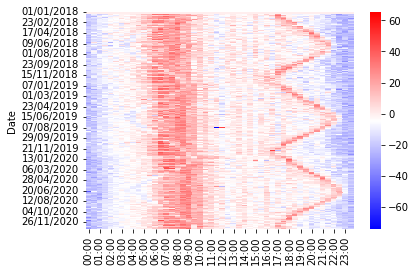

In [30]:
#seaborn.set(rc = {'figure.figsize':(16,12)})
seaborn.heatmap(df2, cmap= 'bwr')

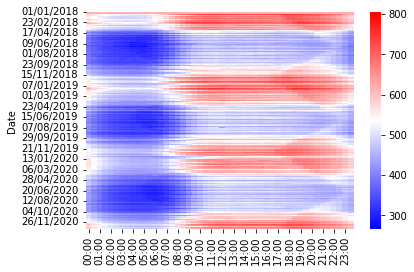

In [31]:
seaborn.heatmap(df4, cmap= 'bwr')

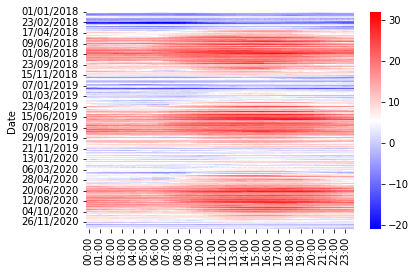

In [32]:
seaborn.heatmap(df6, cmap= 'bwr')

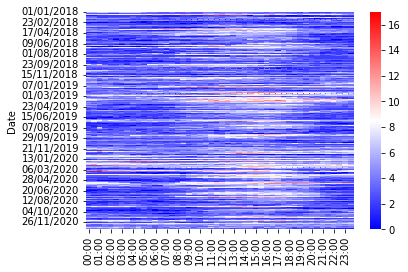

In [33]:
seaborn.heatmap(df8, cmap= 'bwr')

In [34]:
col_num = [col for col in df.columns.tolist() if df[col].dtype not in ['object']]

In [35]:
col_num

['time', 'mean, МВт', 'speed, МВт/ч', 'T', 'P0', 'P', 'U', 'Ff', 'VV', 'Td']

# Факторный анализ, анализ главных компонент (не готово)

Инсталируем библиотеку для факторного анализа

In [36]:
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 489 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 3.4 MB/s 
     |████████████████████████████████| 8.8 MB 43.9 MB/s 
     |████████████████████████████████| 98 kB 6.0 MB/s 
     |████████████████████████████████| 468 kB 39.6 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=17563a45d30f2865a98385e57ec05957cab26c85cbb7999f80ebd50f095807e4
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


Готовим датасет с данными типа float, удаляем ненужные столбы

In [37]:
df.info()
df_fa = df
df_fa = df_fa.drop('time',axis =1)
df_fa = df_fa.drop('DD',axis =1)
df_fa = df_fa.drop('c',axis =1)
df_fa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52611 entries, 0 to 52610
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          52611 non-null  datetime64[ns]
 1   mean, МВт     52611 non-null  float64       
 2   speed, МВт/ч  52611 non-null  float64       
 3   T             52611 non-null  float64       
 4   P0            52611 non-null  float64       
 5   P             52611 non-null  float64       
 6   U             52611 non-null  float64       
 7   DD            52611 non-null  object        
 8   Ff            52611 non-null  float64       
 9   c             52611 non-null  object        
 10  VV            52611 non-null  float64       
 11  Td            52611 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52611 entries, 0 to 52610
Data columns (total 9 columns):
 #   Column 

Проверяем на возможность применения факторного анализа

Тест сферичности Бартлетта проверяет, коррелируют ли наблюдаемые переменные вообще, используя наблюдаемую корреляционную матрицу с единичной матрицей. Если тест оказался статистически незначимым, не следует использовать факторный анализ.

In [38]:
chi_square_value,p_value=calculate_bartlett_sphericity(df_fa)
chi_square_value, p_value

(922171.5298592255, 0.0)

В тесте Бартлетта p-значение равно 0. Тест был статистически значимым, что указывало на то, что наблюдаемая корреляционная матрица не является тождественной матрицей.

Тест Кайзера-Мейера-Олкина (КМО) измеряет пригодность данных для факторного анализа. Он определяет адекватность для каждой наблюдаемой переменной и для всей модели. KMO оценивает долю дисперсии среди всех наблюдаемых переменных. Идентификатор более низкой доли больше подходит для факторного анализа. Значения KMO находятся в диапазоне от 0 до 1. Значение KMO менее 0,6 считается недостаточным.

In [39]:
kmo_all,kmo_model=calculate_kmo(df_fa)
kmo_model

0.41917822666760723

Выбор количества факторов. Можно использовать критерий Кайзера и график осыпи. Оба основаны на собственных значениях.

[2.49430399e+00 2.12908659e+00 1.61214560e+00 1.00608131e+00
 7.15344701e-01 5.70045982e-01 4.71048191e-01 1.93603267e-03
 7.60947521e-06]


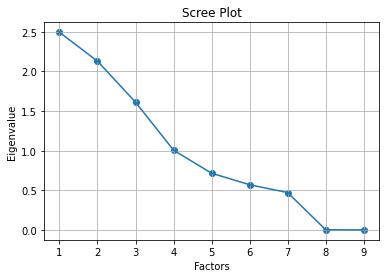

In [40]:
# Create factor analysis object and perform factor analysis

fa = FactorAnalyzer(n_factors=9,rotation=None)
fa.fit(df_fa)
ev, v = fa.get_eigenvalues()
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,df_fa.shape[1]+1),ev)
plt.plot(range(1,df_fa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Метод построения осыпи рисует прямую линию для каждого фактора и его собственных значений. Число собственных значений больше единицы считается числом факторов.

Проведем факторный анализ для нашего количества факторов (4)

In [41]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=4,rotation="varimax")
fa.fit(df_fa)
fa_r = pd.DataFrame(fa.loadings_)
fa_rv = pd.DataFrame(fa.get_factor_variance())


In [42]:
fa_r

,0,1,2,3
0,-0.499193,-0.103399,0.082433,0.854669
1,-0.006780,-0.009054,0.006795,-0.074101
2,0.941622,-0.020569,0.319726,-0.085060
3,-0.042716,0.996553,0.040293,0.031255
4,-0.046507,0.996450,0.038805,0.030970
5,-0.068284,-0.115778,-0.917098,0.008657
6,-0.121113,-0.216174,0.384514,0.131191
7,0.162587,0.086242,0.423080,-0.109575
8,0.988823,-0.072795,-0.081758,-0.083221


In [43]:
fa_rv

,0,1,2,3
0,2.163415,2.070100,1.286796,0.781340
1,0.240379,0.230011,0.142977,0.086816
2,0.240379,0.470390,0.613368,0.700183


# Проверка на нормальность и гистрограммы

In [44]:
from scipy.stats import normaltest

alpha = 0.05

for col in col_num[1:]:
  stat, p =  normaltest(df[col]) # Критерий согласия Пирсона
  print ('Для', col, 'p=', p)
  if p > alpha:
    print('Принять гипотезу о нормальности')
  else:
    print('Отклонить гипотезу о нормальности')

Для mean, МВт p= 0.0
Отклонить гипотезу о нормальности
Для speed, МВт/ч p= 2.91534612127227e-254
Отклонить гипотезу о нормальности
Для T p= 4.266944309881338e-80
Отклонить гипотезу о нормальности
Для P0 p= 8.754943635650449e-271
Отклонить гипотезу о нормальности
Для P p= 3.3133529557468585e-262
Отклонить гипотезу о нормальности
Для U p= 0.0
Отклонить гипотезу о нормальности
Для Ff p= 0.0
Отклонить гипотезу о нормальности
Для VV p= 0.0
Отклонить гипотезу о нормальности
Для Td p= 1.3988381376355586e-195
Отклонить гипотезу о нормальности


Построим боксплоты и распределения по признакам

In [45]:
#найдем число столбцов диаграммы по формуле Стерджеса
opt_bins = 1+3.322*math.log(len(df))
opt_bins

37.11240062876485

Определим для каждого признака свое количество столбцов

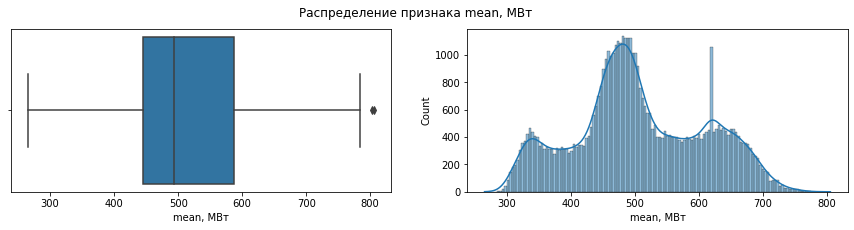

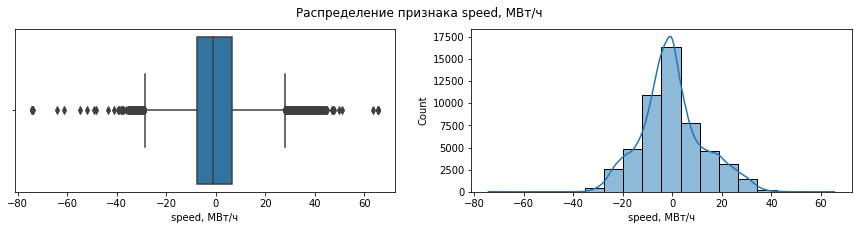

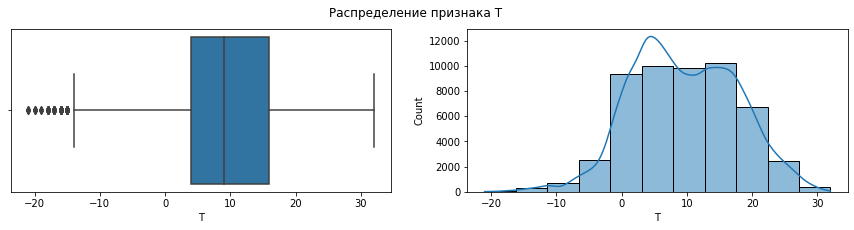

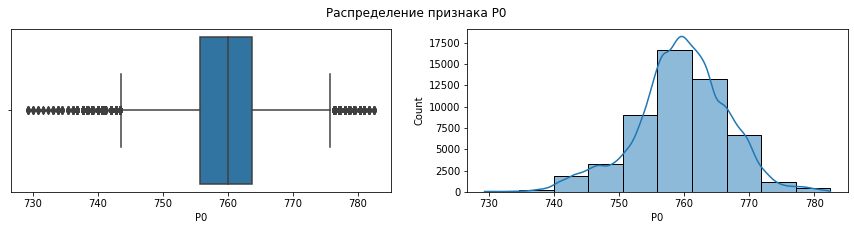

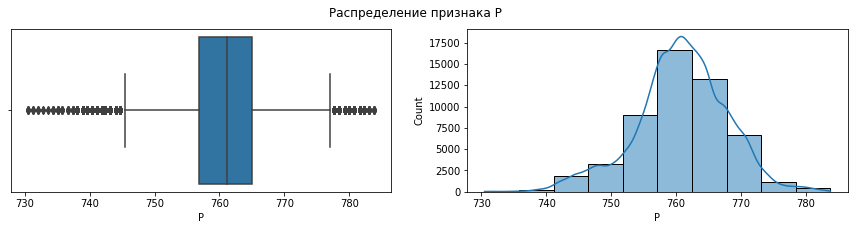

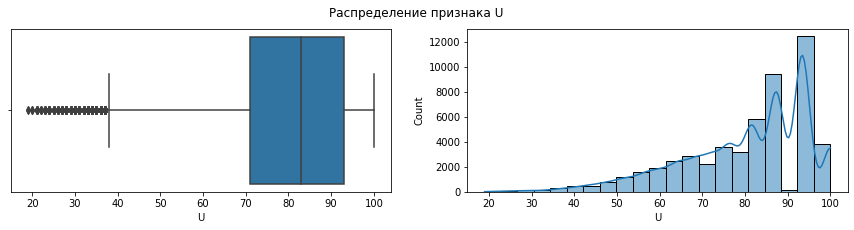

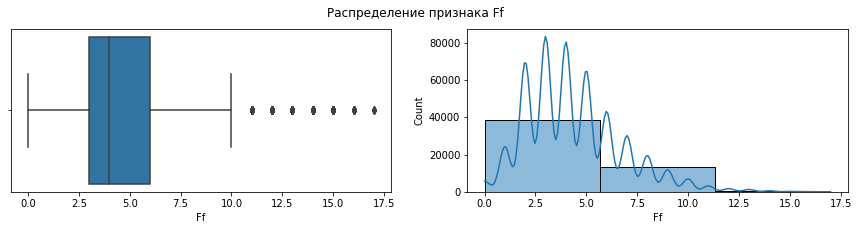

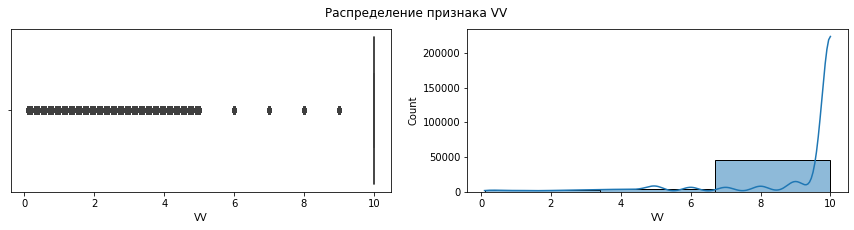

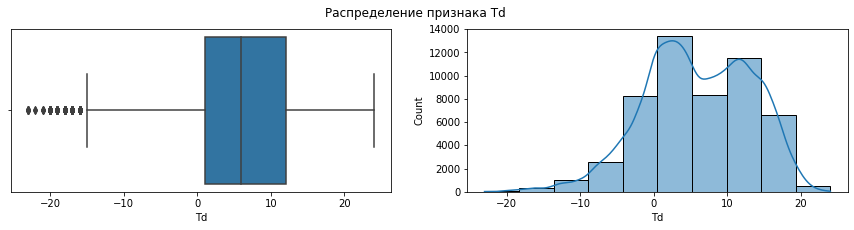

In [46]:
from scipy.stats.morestats import log

for col in col_num[1:]:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    fig.suptitle(f'Распределение признака {col}')
    boxplot = sns.boxplot(
        data=df,
        x=col,
        orient='h',
        width=0.9,
        ax=ax[0]
    )
    
    sns.histplot(
        data=df,
        x=col,
      bins=round(1.39*std.stdev(df[f'{col}'])),
        kde=True,
    );

mean - среднее энергопотребление(за 30 мин)
speed - скорость изменения энергопотребления (за 30 мин)
T - температура воздуха (2м над уровнем земли, С)
P0 - атм.давление на уровне станции (мм.рт.ст)
P  - атм.давление,приведеное  к уровню моря (мм.рт.ст)
U  - относит.влажность воздуха (на высоте 2 м над землей)
Ff - скорость ветра на высоте 10-12 м над уровнем земли,усредненная за 10 мин(м/с)
DD - направление ветра на высоте 10-12 м над уровнем земли,усредненная за 10 мин(румбы)
c  - облачность (пример : Рассеянная (40-50%) 690 м)
VV - горизонтальная видимость (км)
Td - температура точки росы на высое 2 м над уровнем земли (С)

*удалим признак Облачность(с), т.к. этот признак содержит 1156 уникальных значений, содержащих информацию о типе облаков и их высоте. С точки зрения перевода этих данных  в категориальный вид - для модели это означает добавление 1156 новых признаков, может случиться явление под названием "проклятие размерности". (возможно это временная мера)

*также удалим признак P  - атм.давление,приведеное  к уровню моря , т.к. Po и P мультиколлинеарны.

In [47]:
df = df.drop('c',axis =1)
df = df.drop('P',axis =1)

In [48]:
df.describe()

,"mean, МВт","speed, МВт/ч",T,P0,U,Ff,VV,Td
count,52611.000000,52611.000000,52611.000000,52611.000000,52611.000000,52611.000000,52611.000000,52611.000000
mean,506.323387,-0.002077,9.566802,759.582756,80.190759,4.353937,9.083435,5.952862
std,101.329092,12.768592,8.094951,7.093933,14.886623,2.338322,2.119010,7.311843
min,265.460000,-74.242990,-21.000000,729.300000,19.000000,0.000000,0.100000,-23.000000
25%,444.490000,-7.570000,4.000000,755.700000,71.000000,3.000000,10.000000,1.000000
50%,493.570000,-0.990000,9.000000,760.000000,83.000000,4.000000,10.000000,6.000000
75%,586.800000,6.570000,16.000000,763.800000,93.000000,6.000000,10.000000,12.000000
max,805.730000,65.430110,32.000000,782.500000,100.000000,17.000000,10.000000,24.000000


In [49]:
df.describe(include= 'object')

,DD
count,52611
unique,18
top,Wind blowing from the west
freq,5400


In [50]:
col_cat = [col for col in df.columns.tolist() if df[col].dtype in ['object']]

Wind blowing from the west               5400
Wind blowing from the south-west         5380
Wind blowing from the west-southwest     4767
Wind blowing from the south              4176
Wind blowing from the south-southeast    4069
Wind blowing from the south-southwest    3849
Wind blowing from the south-east         3834
Wind blowing from the west-northwest     2831
Wind blowing from the north              2773
Wind blowing from the east-southeast     2595
Wind blowing from the east               2422
Wind blowing from the north-west         2168
Wind blowing from the north-northwest    2007
Wind blowing from the east-northeast     1485
Wind blowing from the north-east         1458
variable wind direction                  1400
Wind blowing from the north-northeast    1328
Calm, no wind                             669
Name: DD, dtype: int64

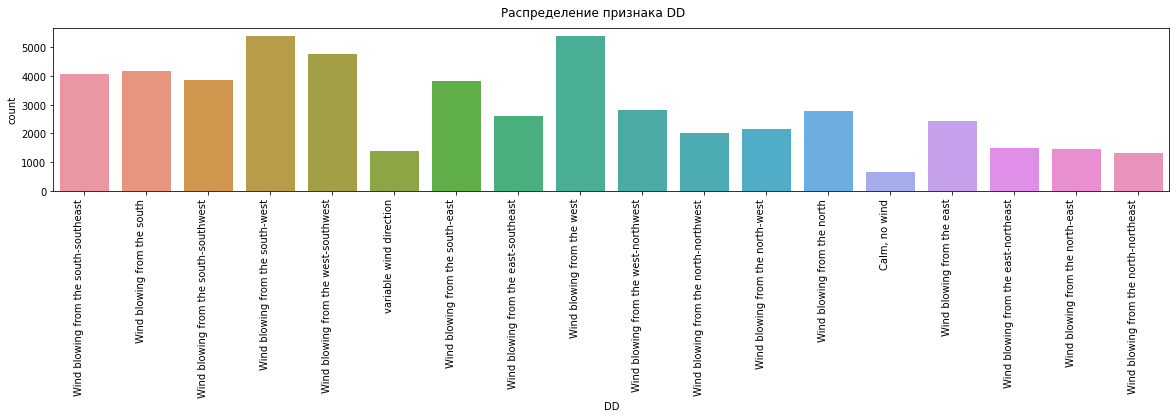

In [51]:
for col in col_cat:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
    fig.suptitle(f'Распределение признака {col}')
    display(df[col].value_counts())
    sns.countplot(data=df, x=col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right') 



# Корреляционный анализ


посмотрим на попарные корреляции каждого признака (скаттерплот)

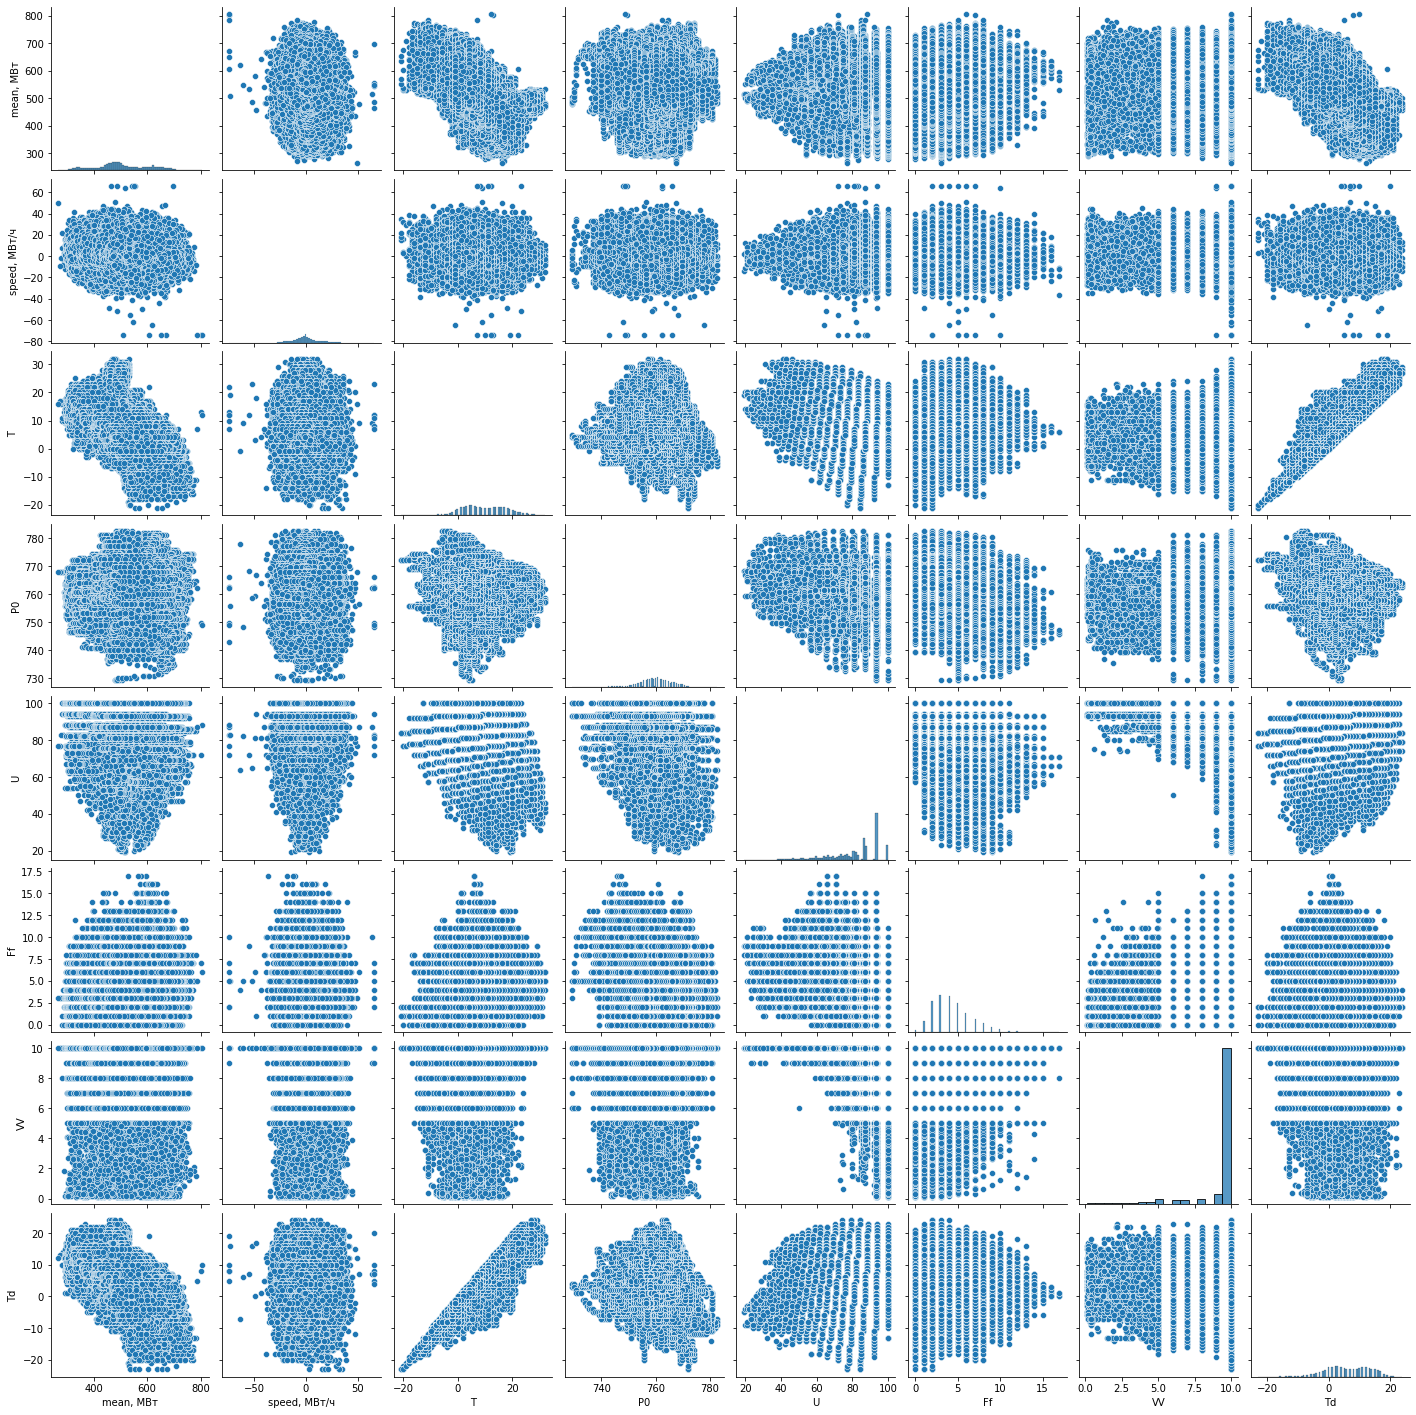

In [52]:
sns.pairplot(df)

Видно,что данные обладаюь слабой силой корреляции. Самая сильная -между температурами Т и Тd.

посмотрим на матрицу корреляции, нас интересует признак speed и mean

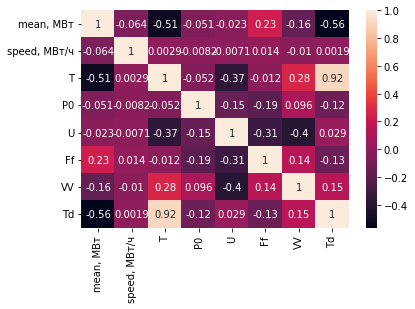

In [53]:
sns.heatmap(df.corr(), annot = True)

Расшифровка:
Отсутствие связи или очень слабая связь  0 - +/-0.3                      
Слабая связь +/-0,3 - +/-0,5
Средняя связь +/-0.5 - +/-0.7
Сильная связь +/-0,7 - +/-0,9
Очень сильная или
абсолютная связь
+/-0.7 - +/-1

Итак, можно сделать предварительный вывод о том, 

что признак speed очень слабо связан с погодными условиями.

Однако, признак mean(среднее энергоптребление за 30 мин) 

высоко коррелирует с температурой, корреляция отрицательная, 

т.е. с падением температуры - энергопотребление возрастает,

что соответствует логике.
 
 Интересным фактом является корреляция (хоть и слабая) между энергопотреблением и направлением ветра.

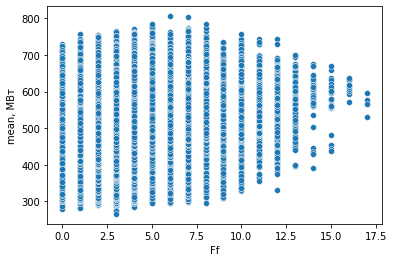

In [54]:
sns.scatterplot(data=df, x="Ff", y="mean, МВт")

Строим по всем признакам qq-plot для визуальной оценки распределения

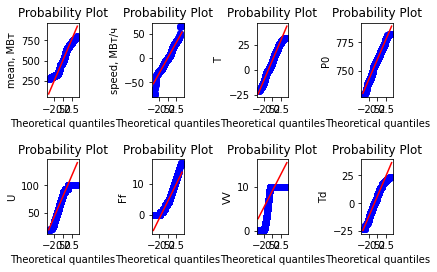

In [55]:
from scipy import stats # библиотека для расчетов
#mean, МВт	speed, МВт/ч	T	P0	U	Ff	VV	Td
plt.subplot(2, 4, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['mean, МВт'], plot=plt) # qq plot
plt.ylabel('mean, МВт')

plt.subplot(2, 4, 2) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['speed, МВт/ч'], plot=plt) # qq plot
plt.ylabel('speed, МВт/ч')

plt.subplot(2, 4, 3) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['T'], plot=plt) # qq plot
plt.ylabel('T')

plt.subplot(2, 4, 4) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['P0'], plot=plt) # qq plot
plt.ylabel('P0')

plt.subplot(2, 4, 5) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['U'], plot=plt) # qq plot
plt.ylabel('U')

plt.subplot(2, 4, 6) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['Ff'], plot=plt) # qq plot
plt.ylabel('Ff')

plt.subplot(2, 4, 7) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['VV'], plot=plt) # qq plot
plt.ylabel('VV')

plt.subplot(2, 4, 8) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['Td'], plot=plt) # qq plot
plt.ylabel('Td')

plt.tight_layout(pad=1.5) 

plt.show() # просмотр графика

нужные данные имеют распределние близкое Гауссу, соответственно можно применять 

# Кластеризация

In [56]:
# импортируем нужный модуль k-means-кластеризации
from sklearn.cluster import KMeans

In [57]:
import datetime
# выведем из даты признаки год,месяц,день,час (т.к. просто с датой кластеризация не пройдет)
df['year'] = pd.to_datetime(df['time']).dt.year
df['month'] = pd.to_datetime(df['time']).dt.month
df['day'] = pd.to_datetime(df['time']).dt.day
df['hour'] = pd.to_datetime(df['time']).dt.hour


In [58]:
#df.drop('time',axis =1, inplace=True)

проверка оптимального количества кластеров (названия признаков меняю туда-сюда перед запуском самой кластеризации, чтоб в K-means поставить оптимальноедля пары признаков

In [59]:
# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters= 4, init='k-means++', n_init=10, random_state=42)
X = df[[ 'T','speed, МВт/ч']]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

In [60]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [61]:
predictions = k_means.predict(X)

In [62]:
df['Clusters'] = predictions

In [63]:
df[df['Clusters'] ==0]['speed, МВт/ч'].describe()

count    16413.000000
mean        -0.703953
std          4.975015
min        -14.330000
25%         -4.610000
50%         -0.740000
75%          2.770000
max         15.410000
Name: speed, МВт/ч, dtype: float64

In [64]:
df[df['Clusters'] ==1]['speed, МВт/ч'].describe()

count    9912.000000
mean       19.882810
std         6.840293
min         8.540000
25%        14.450000
50%        18.760000
75%        24.412500
max        65.430110
Name: speed, МВт/ч, dtype: float64

In [65]:
df[df['Clusters'] ==2]['speed, МВт/ч'].describe()

count    16115.000000
mean        -0.765765
std          5.419772
min        -16.630000
25%         -4.775000
50%         -1.100000
75%          3.050000
max         15.360000
Name: speed, МВт/ч, dtype: float64

SPEED/MONTH

In [66]:
seaborn.set(rc = {'figure.figsize':(10,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


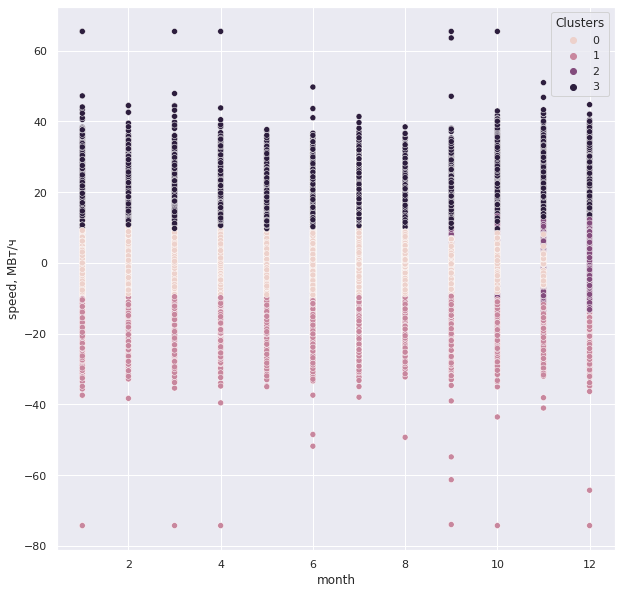

In [79]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['month', 'speed, МВт/ч']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df['month'],  df['speed, МВт/ч'], df['Clusters'])

In [68]:
df.groupby('Clusters').mean()

,"mean, МВт","speed, МВт/ч",T,P0,U,Ff,VV,Td,year,month,day,hour
Clusters,,,,,,,,,,,,
-1,497.016250,-28.660000,11.125000,762.937500,77.750000,4.875000,10.000000,7.250000,2019.000000,8.375000,17.125000,15.125000
0,506.295196,0.003484,9.565746,759.583131,80.190534,4.353610,9.083109,5.951682,2019.001046,6.521573,15.732530,11.497937
1,566.127500,65.430110,13.250000,755.800000,82.500000,5.000000,9.750000,10.250000,2018.750000,2.250000,10.000000,14.750000
2,750.370000,-74.242990,13.500000,755.800000,82.500000,5.000000,10.000000,10.500000,2018.750000,2.250000,10.000000,15.250000
3,516.113333,64.816740,9.666667,758.833333,82.000000,5.666667,9.666667,6.666667,2018.333333,9.333333,20.666667,16.000000
4,610.390000,-74.141993,13.666667,754.900000,82.666667,5.666667,9.666667,10.666667,2019.000000,10.333333,10.000000,12.666667


SPEED/DAY

In [69]:
# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters= 4, init='k-means++', n_init=10, random_state=42)
X = df[[ 'day','speed, МВт/ч']]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

In [70]:
predictions = k_means.predict(X)

In [71]:
df['Clusters'] = predictions

In [72]:
df[df['Clusters'] ==0]['speed, МВт/ч'].describe()

count    16897.000000
mean        -0.829380
std          5.498715
min        -14.720000
25%         -4.860000
50%         -0.900000
75%          2.820000
max         13.930000
Name: speed, МВт/ч, dtype: float64

In [73]:
df[df['Clusters'] ==1]['speed, МВт/ч'].describe()

count    9389.000000
mean      -17.533894
std         5.789940
min       -74.242990
25%       -21.370000
50%       -16.980000
75%       -13.150000
max        -7.440000
Name: speed, МВт/ч, dtype: float64

In [74]:
df[df['Clusters'] ==2]['speed, МВт/ч'].describe()

count    16787.000000
mean        -0.851346
std          5.500376
min        -13.990000
25%         -4.995000
50%         -1.150000
75%          3.100000
max         13.740000
Name: speed, МВт/ч, dtype: float64

In [75]:
df[df['Clusters'] ==3]['speed, МВт/ч'].describe()

count    9538.000000
mean       20.216190
std         6.757522
min         8.390000
25%        14.940000
50%        19.160000
75%        24.670000
max        65.430110
Name: speed, МВт/ч, dtype: float64

In [76]:
df[df['Clusters'] ==4]['speed, МВт/ч'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: speed, МВт/ч, dtype: float64

SPEED/DAY

In [83]:
# импортируем DBSCAN кластеризацию
import sklearn
from sklearn.cluster import DBSCAN
#from sklearn import metrics
#from sklearn.datasets import make_blobs
#from sklearn.preprocessing import StandardScaler


#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['day', 'speed, МВт/ч']])
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
df['Clusters'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 21


In [82]:
df.groupby(df['Clusters']).mean()

,"mean, МВт","speed, МВт/ч",T,P0,U,Ff,VV,Td,year,month,day,hour
Clusters,,,,,,,,,,,,
-1,542.42381,-7.351703,8.428571,760.852381,81.047619,5.476190,9.857143,5.238095,2018.904762,8.285714,17.571429,15.380952
0,506.28767,-0.000431,9.567016,759.583759,80.189132,4.353501,9.083284,5.952622,2019.000970,6.521711,15.733077,11.497689
1,566.12750,65.430110,13.250000,755.800000,82.500000,5.000000,9.750000,10.250000,2018.750000,2.250000,10.000000,14.750000
2,702.17400,-74.182392,14.600000,755.800000,82.600000,5.000000,10.000000,11.600000,2018.800000,3.600000,9.600000,14.400000
3,481.64250,44.232500,2.750000,748.250000,91.750000,2.750000,5.200000,1.500000,2020.000000,3.500000,3.000000,6.000000


SPEED/HOUR

In [ ]:
k_means = KMeans(n_clusters= 3, init='k-means++', n_init=10, random_state=42)
X = df[['hour','speed, МВт/ч']]
# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_
predictions = k_means.predict(X)
df['Clusters'] = predictions

In [ ]:
df[df['Clusters'] ==0]['speed, МВт/ч'].describe()

In [ ]:
df[df['Clusters'] ==1]['speed, МВт/ч'].describe()

In [ ]:
df[df['Clusters'] ==2]['speed, МВт/ч'].describe()

SPEED/HOUR

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['hour', 'speed, МВт/ч']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df['hour'],  df['speed, МВт/ч'], df['Clusters'])

In [ ]:
df.groupby('Clusters').mean()

MEAN/MONTH

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['month', 'mean, МВт']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df['month'],  df['mean, МВт'], df['Clusters'])

In [ ]:
df.groupby('Clusters').mean()

MEAN/DAY

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['day', 'mean, МВт']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df['day'],  df['mean, МВт'], df['Clusters'])

In [ ]:
df.groupby('Clusters').mean()

SPEED/HOUR

MEAN/HOUR

In [ ]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['hour', 'mean, МВт']])

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(df['hour'],  df['mean, МВт'], df['Clusters'])

In [ ]:
df.groupby('Clusters').mean()

**профайлер**

In [ ]:
#pip install pandas-profiling

! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile